In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.stats import linregress

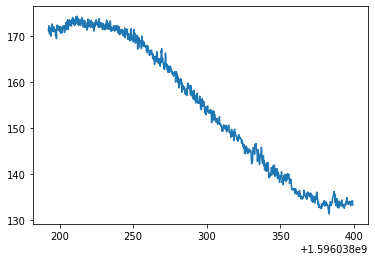

In [3]:
beam=np.load(r"Z:\Shared\Kagome\Data\not_qcontrol\2020\07\29\TemperatureCompensated01W.npy")
plt.plot(beam[0],beam[3])

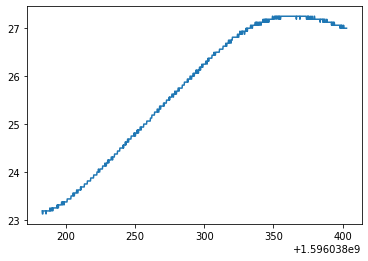

In [4]:
temperature=np.loadtxt(r"Z:\Shared\Kagome\Data\not_qcontrol\2020\07\29\TemperatureCompensated.txt").transpose()
plt.plot(temperature[0],temperature[1])

In [5]:
tmin=max(temperature[0,0],beam[0,0])
tmax=min(temperature[0,-1],beam[0,-1])
tmin,tmax


(1596038192.4479425, 1596038399.287948)

Text(0.5, 1.0, 'waist=423.55180494895944+-10.419931668560313*T')

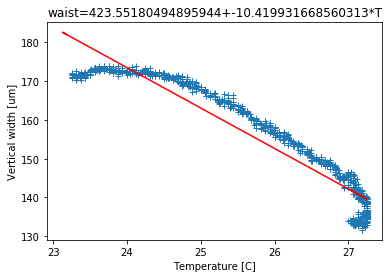

In [7]:
time=np.linspace(tmin,tmax,1000)
temperature_interpolate=interp1d(temperature[0],temperature[1])
waist_interpolate=interp1d(beam[0],beam[3])
#time=time[np.logical_and(temperature_interpolate(time)<27,temperature_interpolate(time)>22)]
plt.plot(temperature_interpolate(time),waist_interpolate(time),"+")
sol=linregress(temperature_interpolate(time),waist_interpolate(time))
T=temperature[1]
plt.plot(T,sol.slope*T+sol.intercept,"r")
plt.xlabel("Temperature [C]")
plt.ylabel("Vertical width [um]")
plt.title("waist={}+{}*T".format(sol.intercept,sol.slope))
#plt.ylim(250,450)

In [48]:
sol.slope/16.5

1.9071828439493363